<img src="https://gotillamook.com/wp-content/uploads/2019/06/recreation-outdoor-movie-night-750x228-2.jpg" width="800" height="150" style="vertical-align:top">

# <center><font size=6> Movie Night for UOP<br>Data Science Masters Students</font> 
<center><font size=3><i>By Marisol Hernandez</i></font></center>  
<center><font size=3><i>10/25/2020</i></font></center>

---

## Table of Contents

[I. Objective](#objective)  
[II. Data Exploration](#data-exploration)  
[III. Dendrogram](#dendrogram)  
[IV. Step by step K means](#step)  
[V. sklearn.cluster](#sklearn.cluster)  
[VI. Prediction](#prediction)  
[VII. Summary](#summary)

## Objective  <a id='objective'></a>
---
As the pandemic prompted many universities to transition to remote learning, administrators and campus instructors were unsure on how students would remain connected during these uncertain times. For the Data Science Master's Program at the University of the Pacific, the transition posed a great challenge since alternating Saturday in-person instruction was the only opportunity for students to collaborate face to face. To maintain a sense of community, the Program Directors want to organize a virtual movie night for the students.

Netflix now enables users to simulataneously watch and chat about Netflix films through Netflix Party, a Google Chrome extension. Disney+ offers the same capability through the Disney Plus Party extension. With these providers, the Data Science Program can host virtual movie nights whenever they want. The only problem left is to determine which movie genre is best suited for their students' preferences.

To help the Directors understand their students' preferences, I aim to create a recommendation engine that can cluster students based on their preferences in *Action*, *Adventure*, and *Thriller* movies so that the Directors can select movies that appeal to their students' tastes. Additionally, the recommendation engine would also help make predictions on new students based on the model created. This would enable the Directors to place a new student with a cluster of students that share similar interests.

## Data Exploration  <a id='data-exploration'></a>
---

### Cocktail
Before conducting any exploratory data analysis, I imported the required libraries, as well as set some `pandas` options.

In [12]:
# Preparation for pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import linkage, dendrogram
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

# Set some pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 30)

### Read in the Data
To begin my EDA, I used `pd.read_csv()` to read the CSV file containing the survey responses, as well as printed the records of the first respondent. From the print out, we can see that the column names are listed to the left, while the response data is listed to the right.

In [13]:
# Read csv file and print records of first respondent
survey = pd.read_csv('MoviesSurvey2020.csv')
survey.iloc[0]

Student Name                                                                                        Chao, Christopher
Using a scale 1 to 10, how much do you like action movies? (use decimals, e.g. 4.2)                               7.0
Using a scale 1 to 10, how much do you like adventure movies? (use decimals, e.g. 4.2)                            8.3
Using a scale 1 to 10, how much do you like comedy movies? (use decimals, e.g. 4.2)                               6.2
Using a scale 1 to 10, how much do you like crime movies? (use decimals, e.g. 4.2)                                6.2
Using a scale 1 to 10, how much do you like drama movies?                                                         4.2
Using a scale 1 to 10, how much do you like fantasy movies?                                                       7.4
Using a scale 1 to 10, how much do you like science fiction movies?                                               8.9
Using a scale 1 to 10, how much do you like horror movie

To make things easier for the clustering algorithms, I decided to set the first column, `Student Name`, as the index.

In [14]:
survey = survey.set_index('Student Name')

Using `.index`, I verified that the index was set to `Student Name`.

In [15]:
# Retrive index
survey.index

Index(['Chao, Christopher', 'Chen, Yu-Wen', 'Chen, Ziheng', 'Duan, Shangyan',
       'Ferrer, Darrel Steve', 'Gong, Minghao', 'Guo, Jie', 'Guo, Ziyu',
       'Hernandez, Marisol', 'Hsiao, Yu-Chen', 'Jiang, Denggao',
       'Kommu, Vasanth', 'Lester, Michelle', 'Li, Binghao', 'Li, Zhiqian',
       'Liao, Ting-Chun', 'Liu, Chang', 'Lunny, Tessa', 'Lyu, Jiye',
       'Lyu, Kunlin', 'Ma, Mingfei', 'Mai, Dat', 'Mao, Ziyuan 'Jessica'',
       'Mei, Yu', 'Molenaar, Chase', 'Ngo, Thi Xuan', 'Nguyen, Don',
       'Ou, Xiang', 'Reyes, Fernando', 'Rosales, Christopher',
       'Shah, Harsh Rajeshkumar', 'Sigel, Daniel', 'Singh, Robin',
       'Swanson, Cameron', 'Tang, Shaojie', 'Wang, Victor', 'YANG, RUIHAO',
       'Yao, Ting', 'Zheng, Tan', 'Nehoran, Dana'],
      dtype='object', name='Student Name')

I also wanted to know how much data I was working with. With the succeeding code, I learned that **40** participants responded to **16** questions, excluding the `Student Name` field. Our cohort is currently composed of 33 participants, including the professor. From the preceding print out, I noticed that the dataframe includes students that have dropped the program. This means I'll have to do some data cleaning on those rows in the following sections.

In [16]:
# Retrieve the dimensions
print("There are " + str(survey.shape[0]) + " rows and " + str(survey.shape[1]) + " columns in this table.")

There are 40 rows and 16 columns in this table.


With `.dtypes`, I retrieved the data types of each column. All but 3 contain *floats*. The 3 remaining columns are of type *object*, which can also be identified as *strings*.

In [17]:
survey.dtypes

Using a scale 1 to 10, how much do you like action movies? (use decimals, e.g. 4.2)            float64
Using a scale 1 to 10, how much do you like adventure movies? (use decimals, e.g. 4.2)         float64
Using a scale 1 to 10, how much do you like comedy movies? (use decimals, e.g. 4.2)            float64
Using a scale 1 to 10, how much do you like crime movies? (use decimals, e.g. 4.2)             float64
Using a scale 1 to 10, how much do you like drama movies?                                      float64
Using a scale 1 to 10, how much do you like fantasy movies?                                    float64
Using a scale 1 to 10, how much do you like science fiction movies?                            float64
Using a scale 1 to 10, how much do you like horror movies?                                     float64
Using a scale 1 to 10, how much do you like mystery movies?                                    float64
Using a scale 1 to 10, how much do you like romance movies?              

Using `.describe()`, I can view a statistical summary of each numeric column. Additionally, I can verify that the responses were within range by looking at the **min** and **max** of each column. All numeric responses were below the threshold of 10. Four columns, however, contain responses below the threshold of 1, but above 0. To make things easier, I decided to expand the threshold from between 1 and 10 to between **0 and 10**.

In [18]:
survey.describe()

       Using a scale 1 to 10, how much do you like action movies? (use decimals, e.g. 4.2)  \
count                                          32.000000                                     
mean                                            8.271875                                     
std                                             1.530599                                     
min                                             4.500000                                     
25%                                             7.000000                                     
50%                                             8.400000                                     
75%                                             9.900000                                     
max                                            10.000000                                     

       Using a scale 1 to 10, how much do you like adventure movies? (use decimals, e.g. 4.2)  \
count                                          32.000000

### Data Cleaning

As mentioned earlier, I expected my dataframe to contain missing values. To verify, I ran the following code to retrieve a total sum of missing values per column. We can see that every single one of the columns contain missing values.

In [19]:
survey.iloc[:,:].isnull().sum()

Using a scale 1 to 10, how much do you like action movies? (use decimals, e.g. 4.2)             8
Using a scale 1 to 10, how much do you like adventure movies? (use decimals, e.g. 4.2)          8
Using a scale 1 to 10, how much do you like comedy movies? (use decimals, e.g. 4.2)            10
Using a scale 1 to 10, how much do you like crime movies? (use decimals, e.g. 4.2)              8
Using a scale 1 to 10, how much do you like drama movies?                                       8
Using a scale 1 to 10, how much do you like fantasy movies?                                     7
Using a scale 1 to 10, how much do you like science fiction movies?                             8
Using a scale 1 to 10, how much do you like horror movies?                                      8
Using a scale 1 to 10, how much do you like mystery movies?                                     9
Using a scale 1 to 10, how much do you like romance movies?                                     8
Using a scale 1 to 1

I did not want to lose too much data by removing the rows that contained missing values. Instead, I decided to fill the missing values of the numeric columns with the <ins>mean</ins> of its corresponding column. This seemed like the most reasonable place holder because it would not significantly affect our clustering.

In [20]:
for i in range(0,13):
    survey.iloc[:,i].fillna(survey.iloc[:,i].mean(), inplace=True)

Running the same code as earlier, we can now see that none of the numeric columns contain any missing values.

In [21]:
survey.iloc[:,:].isnull().sum()

Using a scale 1 to 10, how much do you like action movies? (use decimals, e.g. 4.2)            0
Using a scale 1 to 10, how much do you like adventure movies? (use decimals, e.g. 4.2)         0
Using a scale 1 to 10, how much do you like comedy movies? (use decimals, e.g. 4.2)            0
Using a scale 1 to 10, how much do you like crime movies? (use decimals, e.g. 4.2)             0
Using a scale 1 to 10, how much do you like drama movies?                                      0
Using a scale 1 to 10, how much do you like fantasy movies?                                    0
Using a scale 1 to 10, how much do you like science fiction movies?                            0
Using a scale 1 to 10, how much do you like horror movies?                                     0
Using a scale 1 to 10, how much do you like mystery movies?                                    0
Using a scale 1 to 10, how much do you like romance movies?                                    0
Using a scale 1 to 10, how muc

## Dendrogram  <a id='dendrogram'></a>
---

I decided that I wanted to cluster my participants based on their interest in *Action*, *Adventure*, and *Thriller* movies. To capture these responses, I created another subset with just those **3 columns**.

In [22]:
subset = survey.iloc[:,[0,1,10]]

To verify, I used `.columns` on my new subset.

In [23]:
subset.columns

Index(['Using a scale 1 to 10, how much do you like action movies? (use decimals, e.g. 4.2)',
       'Using a scale 1 to 10, how much do you like adventure movies? (use decimals, e.g. 4.2)',
       'Using a scale 1 to 10, how much do you like thriller movies?'],
      dtype='object')

Since my subset is 3-dimensional, I made a *3D scatter plot* so I could visualize all my data points. This scatter plot also enables users to hover over each data point to retrieve the response values, as well as the Student Name.

In [24]:
fig = go.Figure(data=[go.Scatter3d(x=subset.iloc[:,0], y=subset.iloc[:,1], z=subset.iloc[:,2], mode='markers', 
                                   text=subset.index)])
        
fig.update_layout(scene = dict(
    xaxis_title="Action",
    yaxis_title="Adventure",
    zaxis_title="Thriller"),
    width=1000,
    margin=dict(r=30, b=10, l=10, t=10))
        
fig.show()

Though I could determine the $k$ number of clusters from just my plot above, I decided to make a dendrogram that allocates participants into clusters. From the color scheme below, I can determine that the participants are allocated into **3 clusters**.

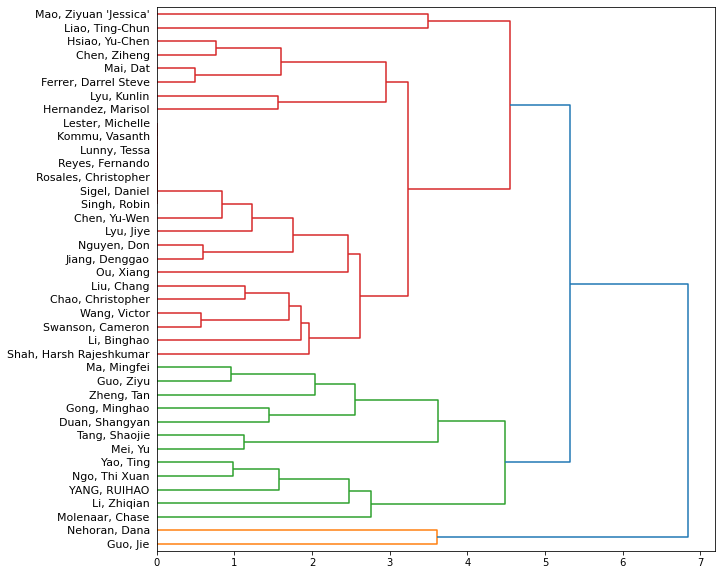

In [25]:
figure(figsize=(10, 10))
D = dendrogram(linkage(subset, 'average'), orientation="right", leaf_font_size=11, labels = subset.index)

## Step-by-step K-means <a id='step'></a>
---

### Random Centroids

The next step was to establish random centroids according to the $k$ I determined in the previous section. To begin, I created a copy of my subset.

In [46]:
first = subset.copy()

Since I determined $k = 3$, I created and added 3 random centroids to my dataframe.

In [52]:
first.loc['Centroid 1'] = [7, 1, 5]
first.loc['Centroid 2'] = [6, 9, 3]
first.loc['Centroid 3'] = [9, 5.5, 8]

Before I could create another 3D scatter plot, I created an array `c` that specifies the colors of each of my data points. Below, you can see that I chose all 40 of my original data points to be grey and each of my centroids a different color.

In [53]:
c = np.concatenate((np.repeat("grey", 40), np.array(["navy","yellow","red"])))

Plotting the data of my new copy, we can now see where each of my centroids lie.

In [54]:
fig = go.Figure(data=[go.Scatter3d(x=first.iloc[:,0], y=first.iloc[:,1], z=first.iloc[:,2], mode='markers', 
                marker=dict(color=c, size=np.concatenate((np.repeat(17,40), np.array([30,30,30])))), text=first.index)])
        
fig.update_layout(scene = dict(
    xaxis_title="Action",
    yaxis_title="Adventure",
    zaxis_title="Thriller"),
    width=1000,
    margin=dict(r=30, b=10, l=10, t=10))
        
fig.show()

### Clustering Algorithm
I wanted to create a function called `kmeans()` which accepts a dataframe `df` and `k` clusters as parameters, and returns the clusters created. I wanted to take a step further and build a function that creates clusters manually without any external libraries. The function performs the following:

1. Establishes `k` random centroids.
2. Creates an `Association` column.
3. Calculates the distance between each point and each centroid.
4. Finds the minimum distance and associates the point with the corresponding centroid.
5. Recenters the centroids.
6. Allocates the association of each centroid.
7. Plots the clusters.

In [59]:
def kmeans(df,k):
    test = df.copy()
    
    for i in range(1,k+1):
        test.loc['Centroid '+str(i)] =  np.random.randint(0,11,3)
        
    test["Association"] = ""
    
    j = 1
    
    while j < 50:
        for i in range(1,k+1):
            test[str(i)] = np.sqrt((test.iloc[:,0] - test.loc['Centroid '+str(i)][0])**2
                                   + (test.iloc[:,1] - test.loc['Centroid '+str(i)][1])**2
                                   + (test.iloc[:,2] - test.loc['Centroid '+str(i)][2])**2)
            
        test["Association"] = pd.to_numeric(test.iloc[:,4:].idxmin(axis = 1))
        
        for i in range(1,k+1):
            test.loc['Centroid '+str(i)] = test[test.Association == i].iloc[0:39,0:3].mean()
            
        for i in range(1, k+1):
            test.loc['Centroid '+str(i)]["Association"] = i
        
        j = j + 1
            
    fig = go.Figure(data=[go.Scatter3d(x=test.iloc[:,0], y=test.iloc[:,1], z=test.iloc[:,2], mode='markers', 
                          marker=dict(color=test["Association"], size=np.concatenate((np.repeat(17,40), 
                          np.repeat(35,k)))), text=test.index)])
    
    fig.update_layout(scene = dict(
        xaxis_title="Action",
        yaxis_title="Adventure",
        zaxis_title="Thriller"),
                      width=1000,
                      margin=dict(r=30, b=10, l=10, t=10))
    fig.show()

Running the function on the `subset` dataframe and specifying $k = 3$ returns the following clusters.

In [65]:
kmeans(subset,3)

<ipython-input-59-46b419f5a443>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## sklearn.cluster  <a id='sklearn.cluster'></a>
---

Again, I want to run unsupervised k-means clusters, but this but this time using the `sklearn.cluster` library. The library consists of a function called `KMeans()` where we can specify the number of clusters with the `n_clusters` parameter as seen below. In this case, I ran the function so that it creates 3 clusters on my `subset` dataframe.

In [61]:
# K Means Cluster
model = KMeans(n_clusters = 3)
model.fit(subset)

KMeans(n_clusters=3)

Using the `.labels_` method on our model retrieves an array of the associated clusters.

In [62]:
model.labels_

array([0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 2], dtype=int32)

### Plotting Clusters with k = 3

Now I was able to plot my 3 clusters by defining the color of my points to equal `model.labels_`.

In [64]:
fig = go.Figure(data=[go.Scatter3d(x=subset.iloc[:,0], y=subset.iloc[:,1], z=subset.iloc[:,2], mode='markers', 
                                   marker=dict(color=model.labels_), text=subset.index)])
        
fig.update_layout(scene = dict(
    xaxis_title="Action",
    yaxis_title="Adventure",
    zaxis_title="Thriller"),
    width=1000,
    margin=dict(r=30, b=10, l=10, t=10))
        
fig.show()

## Prediction  <a id='prediction'></a>
---

Lastly, I wanted to create a function called `predictKNN` that takes 3 parameters, which represent a score for each of genre, *Action*, *Adventure*, and *Thriller*, and returns a prediction for the cluster the student belongs to.

In [35]:
def predictKNN(action, adventure, thriller):
    knn = KNeighborsClassifier(n_neighbors = 5, p = 2)
    knn.fit(subset, model.labels_)
    
    cluster = knn.predict(np.array([action, adventure, thriller]).reshape(1, -1))[0]
    color = ["Blue", "Pink", "Yellow"]
    print('Action Score:', action, '\nAdventure Score:', adventure, '\nThriller Score:', thriller,
          '\nPrediction: Cluster #', cluster, color[cluster])

I ran the function 10 times with different parameters. Each run returned accurate predictions.

In [66]:
# 1
predictKNN(9,8,3)

Action Score: 9 
Adventure Score: 8 
Thriller Score: 3 
Prediction: Cluster # 1 Pink


In [67]:
# 2
predictKNN(10,10,5)

Action Score: 10 
Adventure Score: 10 
Thriller Score: 5 
Prediction: Cluster # 1 Pink


In [68]:
# 3
predictKNN(9,8,8)

Action Score: 9 
Adventure Score: 8 
Thriller Score: 8 
Prediction: Cluster # 0 Blue


In [69]:
# 4
predictKNN(2,6,7)

Action Score: 2 
Adventure Score: 6 
Thriller Score: 7 
Prediction: Cluster # 0 Blue


In [70]:
# 5
predictKNN(3,1,1)

Action Score: 3 
Adventure Score: 1 
Thriller Score: 1 
Prediction: Cluster # 1 Pink


In [71]:
# 6
predictKNN(10,10,10)

Action Score: 10 
Adventure Score: 10 
Thriller Score: 10 
Prediction: Cluster # 0 Blue


In [72]:
# 7
predictKNN(3,8,2)

Action Score: 3 
Adventure Score: 8 
Thriller Score: 2 
Prediction: Cluster # 1 Pink


In [73]:
# 8
predictKNN(8.3,1.7,5.6)

Action Score: 8.3 
Adventure Score: 1.7 
Thriller Score: 5.6 
Prediction: Cluster # 0 Blue


In [74]:
# 9
predictKNN(4.3,2.7,6.6)

Action Score: 4.3 
Adventure Score: 2.7 
Thriller Score: 6.6 
Prediction: Cluster # 0 Blue


In [75]:
# 10
predictKNN(2.9,7.8,2.2)

Action Score: 2.9 
Adventure Score: 7.8 
Thriller Score: 2.2 
Prediction: Cluster # 1 Pink


## Summary  <a id='summary'></a>
---
When hosting a virtual movie night for the students of the Data Science Program, the Directors might want to better understand their students' preferences. One method they could use is clustering, a method of grouping objects in a way where the objects in the same group are more similar than objects in other groups. In this case, clustering groups students that share similar preferences into the same cluster. This can help the Directors understand their students' preferences a lot better so that they can choose a movie that better suits their interests.

In my cluster analysis, I decided to cluster students based on their interests in *Action*, *Adventure* and *Thriller* movies. With these 3 attributes, I created a dendrogram to help determine the number of clusters I have. Based on the color scheme, I determine my data was composed of **3 clusters**. Next, I established 3 random centroids with my data in a 3D scatter plot. I then created a clustering function called `kmeans()` that takes in a dataframe and $k$ as parameters and returns the clusters created. In this plot, I could see the difference in placement of my centroids.

To verify my clusters, I ran another unsupervised k-means clusters using the `sklearn.cluster` library. There were a few difference in the clusters created by my own algorithm and the library itself, but nothing too drastic. If anything, the `sklearn.cluster` library provides greater accuracy. Lastly, I created a function called `predictKNN()` that makes a prediction for the cluster a student belongs to based on their preferences.

My analysis can bring tremendous support when organizing a movie night for the Data Science students because it provides a better understanding of the students' preferences. The Directors could use the clusters created to perhaps design a series a movie nights where they choose a movie that appeals to each cluster. Additionally, they can use my recommendation engine to classify any new students based on their interests.